In [1]:
# !pip install opencv-python transformers accelerate
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, AutoencoderKL, UniPCMultistepScheduler
import torch
from diffusers.utils import load_image


import numpy as np


import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
controlnets = [
    ControlNetModel.from_pretrained("./albedo_control/controlnet_1/", torch_dtype=torch.float16),
    ControlNetModel.from_pretrained("./albedo_control/controlnet_3/", torch_dtype=torch.float16),
]
pipe = StableDiffusionControlNetPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", controlnet=controlnets, torch_dtype=torch.float16)

text_encoder\model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [3]:
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()


In [5]:
shadow = load_image('./samples/6b3e84ec82a58467a51eb6c5899ddd1dde1af7ab_pred_shd.png')
albedo = load_image('./samples/6b3e84ec82a58467a51eb6c5899ddd1dde1af7ab_pred_alb.png')
shd1 = load_image('./samples/7ba910be7cf3e5716780e1e1f637d0f3dffe1d46_pred_shd.png')
abd1 = load_image('./samples/7ba910be7cf3e5716780e1e1f637d0f3dffe1d46_pred_alb.png')
shd2 = load_image('./samples/62f95f66e33ad38a252eb14f00a5b0ed51790f47_pred_shd.png')
abd2 = load_image('./samples/62f95f66e33ad38a252eb14f00a5b0ed51790f47_pred_alb.png')

In [6]:
bed1 = load_image('./bedroom/breakfast-lamps_pred_shd.png')
bed2 = load_image('./bedroom/room_pred_shd.png')
bed3 = load_image('./bedroom/thumb_pavilion-day_pred_shd.png')
bed4 = load_image('./bedroom/file_4_pred_shd.png')
bed5 = load_image('./bedroom/file_5_pred_shd.png')
bed6 = load_image('./bedroom/file_6_pred_shd.png')
bed7 = load_image('./bedroom/file_7_pred_shd.png')
bed8 = load_image('./bedroom/file_8_pred_shd.png')
bed9 = load_image('./bedroom/file_86_pred_shd.png')
bed10 = load_image('./bedroom/file_99_pred_shd.png')

In [25]:
def styletransfer(shadow, albedo):
    images = [shadow, albedo]
    # generator = np.random.seed(0)
    image = pipe(
    "",
    num_inference_steps=60,
    image=images,
    controlnet_conditioning_scale=[1.7, 0.7],
    # control_guidance_start=[0.0,0.0],
    # control_guidance_end=[1.0, 0.3],
    # generator=generator,
    # guess_mode=True,
    
    ).images[0]
    # plot the image

    #plot the shadow, albedo and image
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.imshow(shadow)
    plt.title('shadow')
    plt.subplot(132)
    plt.imshow(albedo)
    plt.title('albedo')
    plt.subplot(133)
    plt.imshow(image)
    plt.title('image')
    plt.show()

  0%|          | 0/60 [00:00<?, ?it/s]

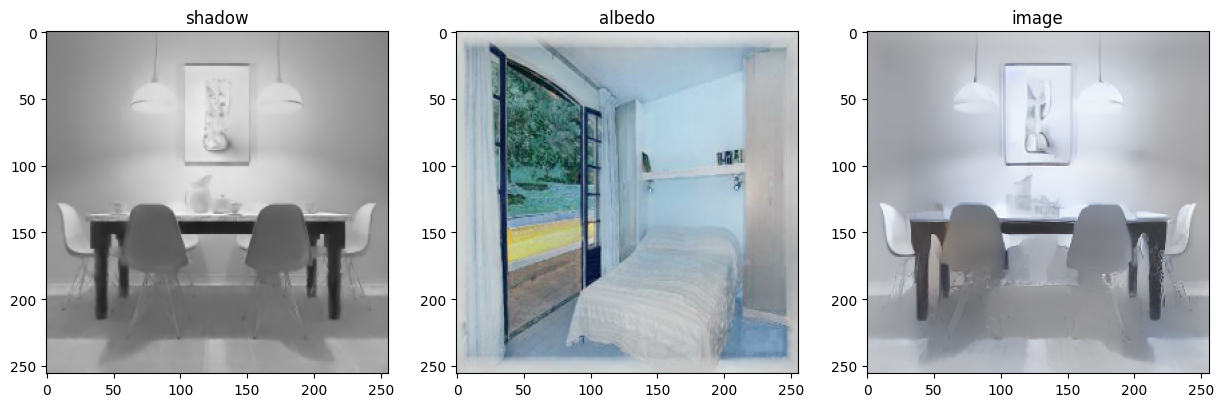

  0%|          | 0/60 [00:00<?, ?it/s]

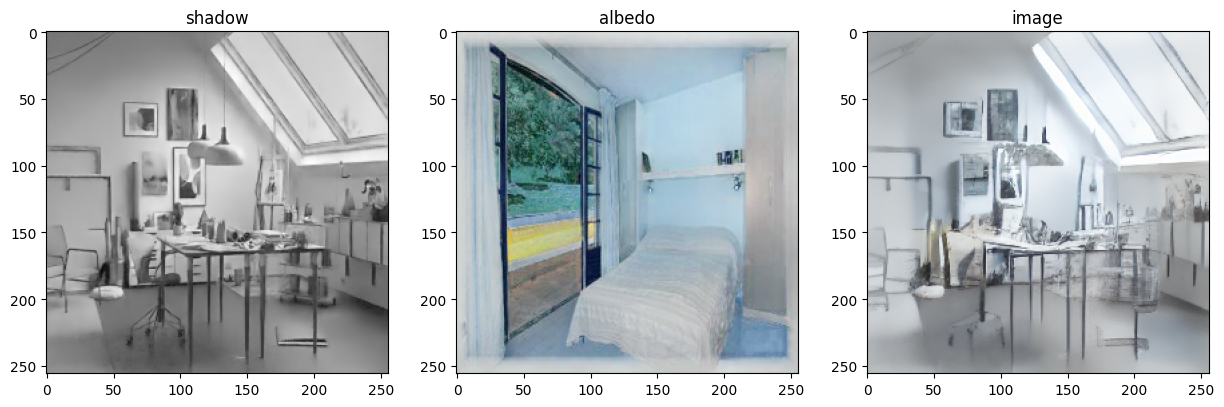

  0%|          | 0/60 [00:00<?, ?it/s]

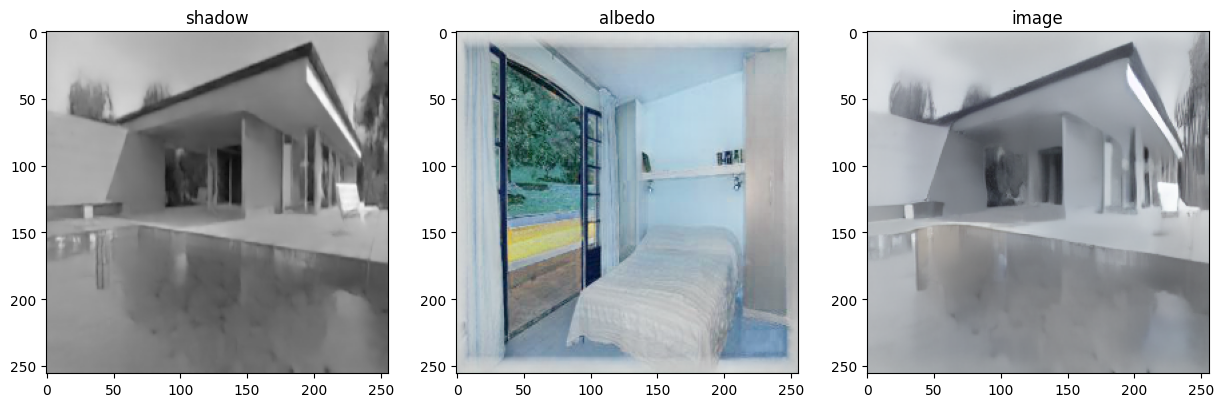

  0%|          | 0/60 [00:00<?, ?it/s]

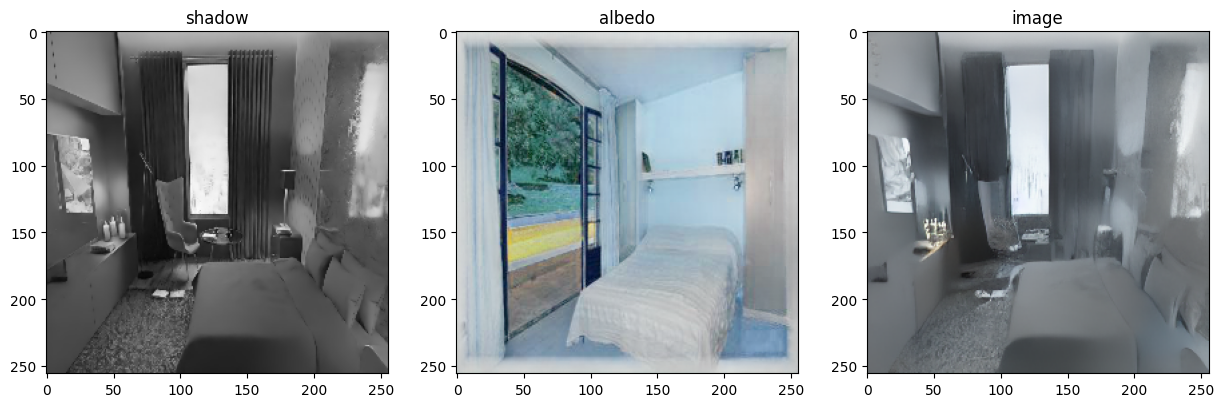

  0%|          | 0/60 [00:00<?, ?it/s]

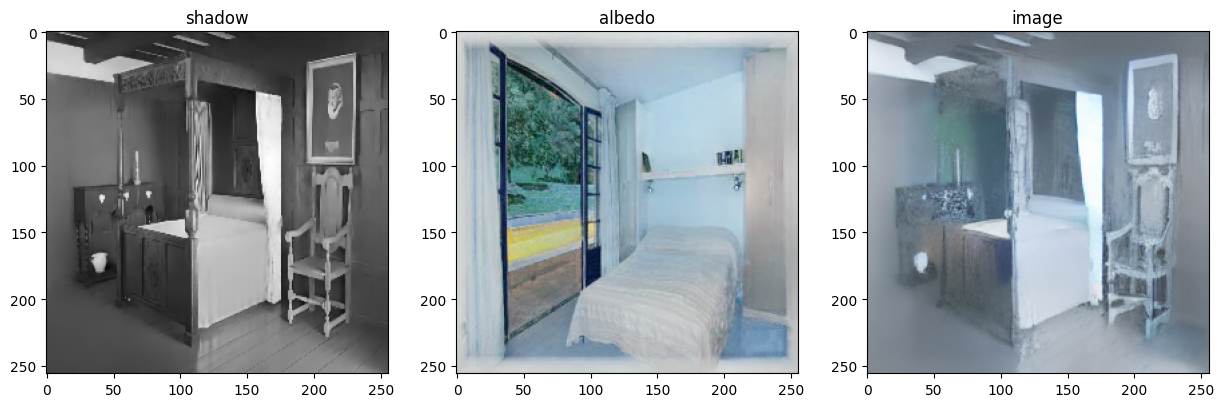

  0%|          | 0/60 [00:00<?, ?it/s]

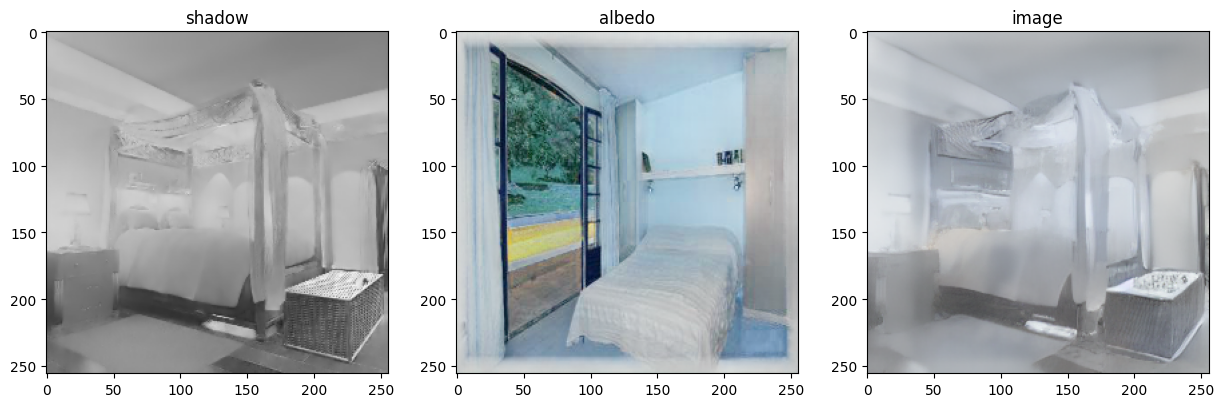

  0%|          | 0/60 [00:00<?, ?it/s]

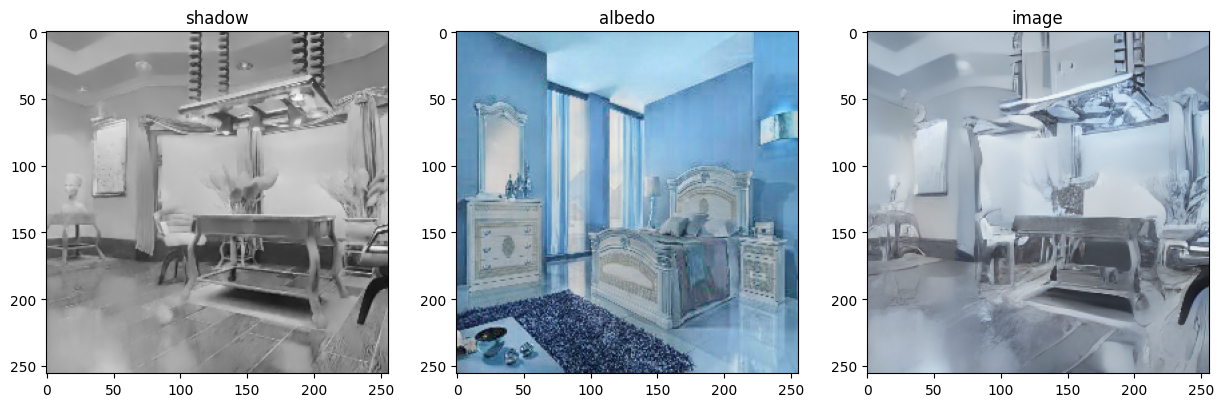

  0%|          | 0/60 [00:00<?, ?it/s]

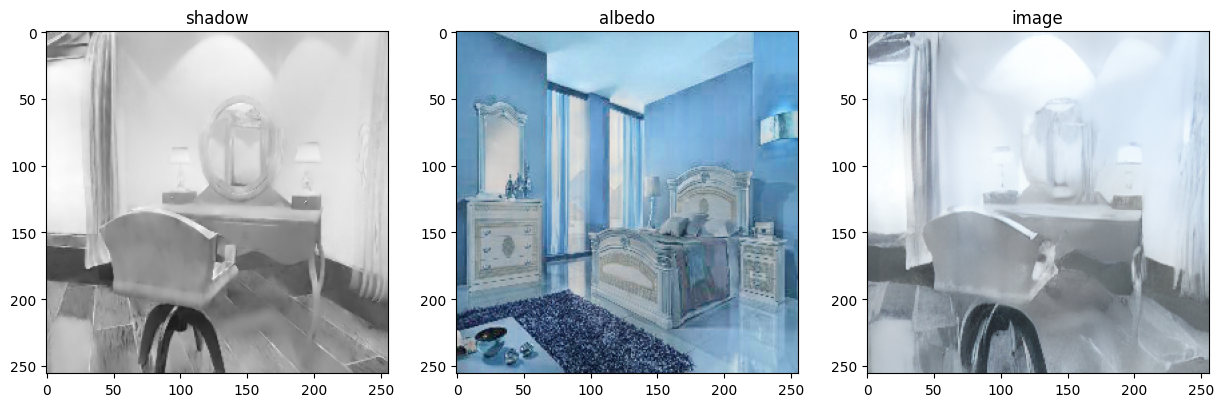

  0%|          | 0/60 [00:00<?, ?it/s]

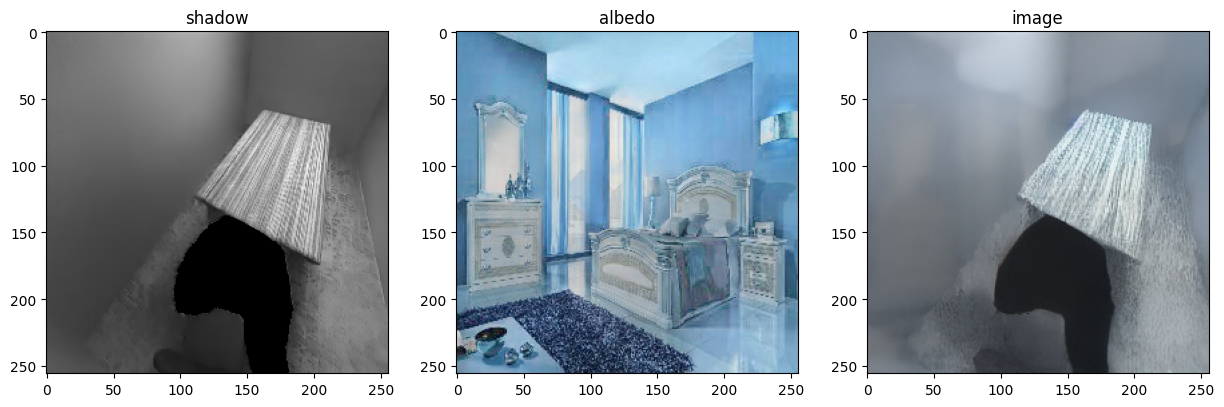

  0%|          | 0/60 [00:00<?, ?it/s]

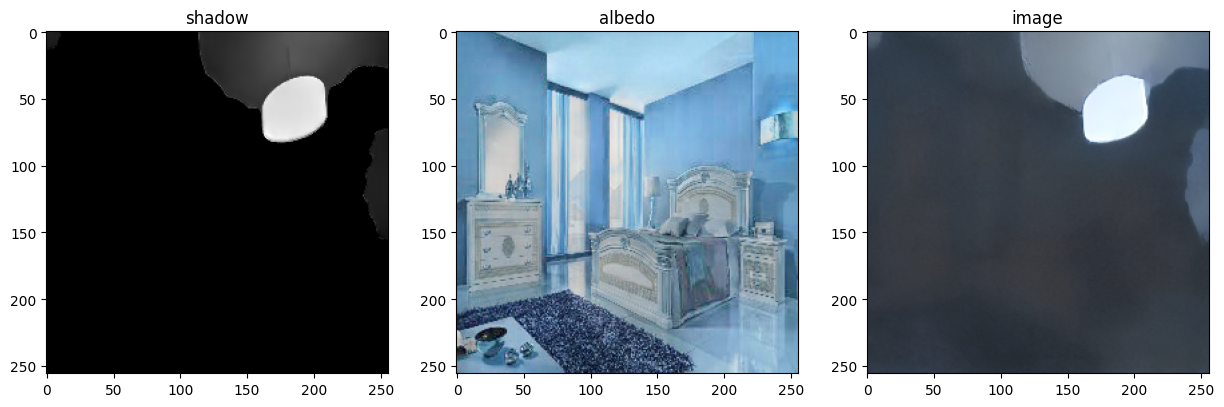

In [26]:
styletransfer(bed1,albedo)
styletransfer(bed2,albedo)
styletransfer(bed3,albedo)
styletransfer(bed4,albedo)
styletransfer(bed5,albedo)
styletransfer(bed6,albedo)

styletransfer(bed7,abd2)
styletransfer(bed8,abd2)
styletransfer(bed9,abd2)
styletransfer(bed10,abd2)